# 1. Import All Necessary Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 2. Load and Inspect Data

#### Load Data and using df.head() to print first 5 rows

In [9]:
telco_df = pd.read_csv('Customer-Churn.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Inspect Data

In [10]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
telco_df.shape

(7043, 21)

In [13]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

telco_df[numerical_cols].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


# 3. Data Cleaning

#### Identify Missing or Null Values

In [16]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Convert `TotalCharges` to a numeric type
We will convert the `TotalCharges` column to a numeric type to handle any non-numeric values and coerce errors into `NaN`.


In [17]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

### Check for missing values after conversion
Now we will check if the conversion of `TotalCharges` has introduced any `NaN` values due to non-numeric entries in the original dataset.

In [18]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### NaN values in TotalCharges column
Let's see those 11 missing values(NaN) rows of `TotalCharges` column

In [19]:
telco_df[telco_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Handle Missing Values in `TotalCharges`
Let's use median since median imputation is more robust in the presence of `outliers`

In [20]:
telco_df['TotalCharges'].fillna(telco_df['TotalCharges'].median(), inplace=True)

/tmp/ipykernel_257315/912251942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco_df['TotalCharges'].fillna(telco_df['TotalCharges'].median(), inplace=True)


#### Now let's run `telco_df.isnull().sum()` again

In [21]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Check for duplicates records
Because duplicates can skew analysis and predictions

In [22]:
telco_df.duplicated().sum()

np.int64(0)

#### Standardize Categorical Variables

**Lowercasing Categories**

In [23]:
# let's apply lowercase to the multiple categorical columns
categorical_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

telco_df[categorical_columns] = telco_df[categorical_columns].apply(lambda x: x.str.lower())

**Map Binary values to 0 and 1**

In [24]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'Churn']
telco_df[binary_columns] = telco_df[binary_columns].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_257315/877456278.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_df[binary_columns] = telco_df[binary_columns].replace({'yes': 1, 'no': 0})


#### Ensure Correct Data Types

In [25]:
telco_df['Contract'].astype('category')

0       month-to-month
1             one year
2       month-to-month
3             one year
4       month-to-month
             ...      
7038          one year
7039          one year
7040    month-to-month
7041    month-to-month
7042          two year
Name: Contract, Length: 7043, dtype: category
Categories (3, object): ['month-to-month', 'one year', 'two year']

#### Let's Drop `customerID`
Since it doesn't provide any useful information

In [26]:
telco_df = telco_df.drop(columns=['customerID'])

#### Let's Drop the Rows where `tenure` == 0
since these are 11 out of 7043 rows, it won't affect the data

In [27]:
# Let's review them first 
telco_df[telco_df['tenure'] == 0]

# Filter out the rows
telco_df = telco_df[telco_df['tenure'] != 0]

# 4. Exploratory Data Analysis (EDA)

<Axes: xlabel='gender'>

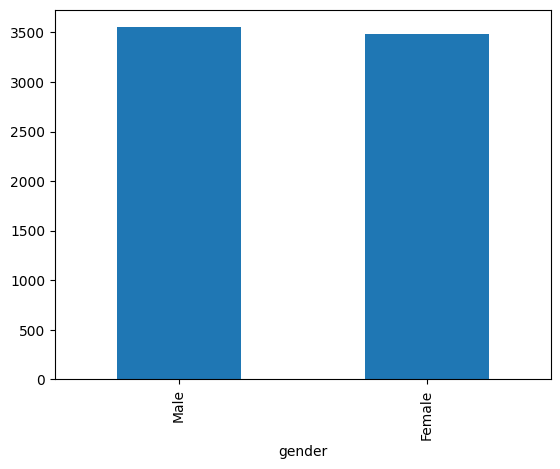

In [28]:
telco_df['gender'].value_counts().plot(kind='bar')

### Univariate Analysis

#### 1) Distribution of `Tenure`

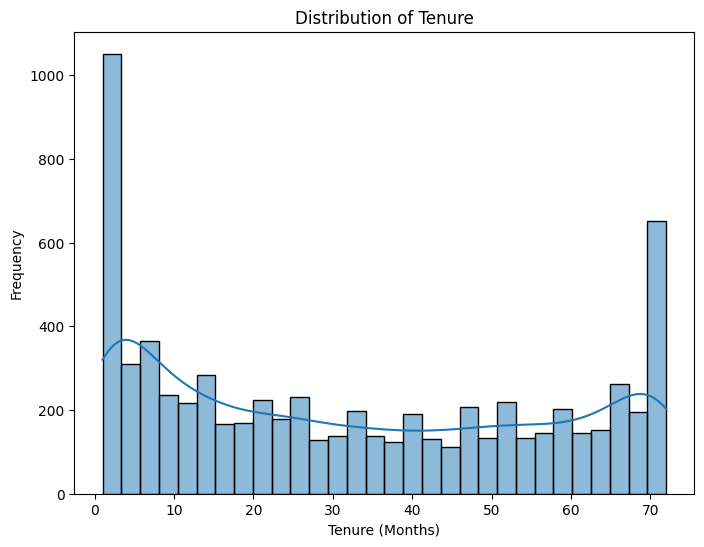

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(telco_df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

#### Story Time

**As we can see the early spark means we are attracting customers well (e.g Marketing strategies are really good) but we need to ensure they don't churn early on**

**The later high-frequency spike suggests that customers who have stayed with the company for a long time are higher loyal, likely representing valuable customers**

**in between, the decline of customers suggests that a portion of them are not sticking around for the long period of time and we need to focus on improving retention strategies for new customers**

#### 2) Box Plot of `MonthlyCharges`

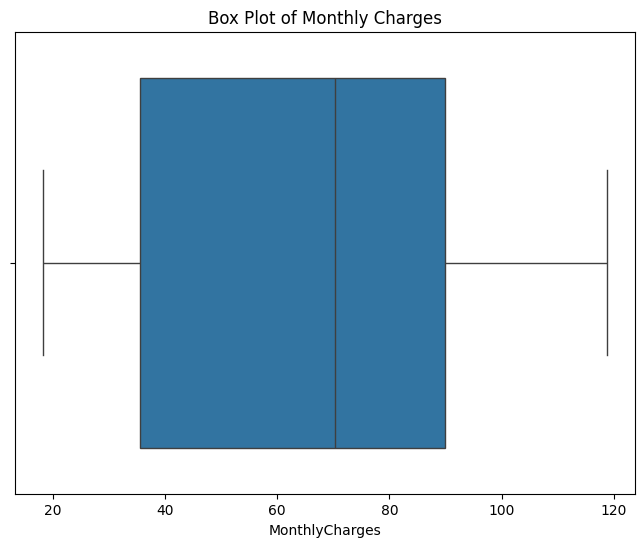

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyCharges', data=telco_df)
plt.title('Box Plot of Monthly Charges')
plt.show()

#### Story Time

**As we can see, Most customers are paying b/w $35 and $90, with the median close to $70**

**There's a wide range of monthly charges and there are a few extreme cases both on the lower and higher ends (also known as `outliers`)**

**`Outliers` are relatively few compared to the bulk of the data b/w $35 and $90, meaning few customers are paying either $18 to $35(lower end) or around $90-$119(higher end)**

#### 3) Count of Customers by `Gender`

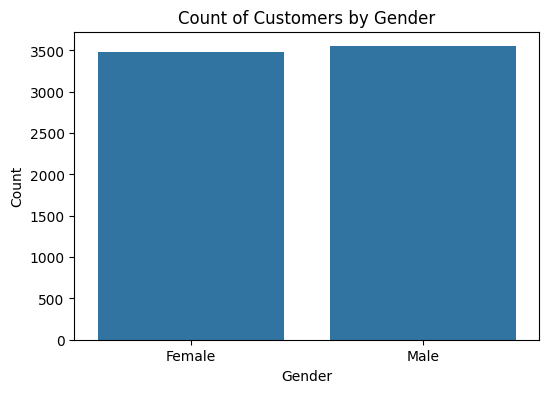

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=telco_df)
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Story Time

**Division of Customers by Gender, on the y-axis we have count(the number of customers) and on x-axis we have male and female**

#### 4) Churn Distribution

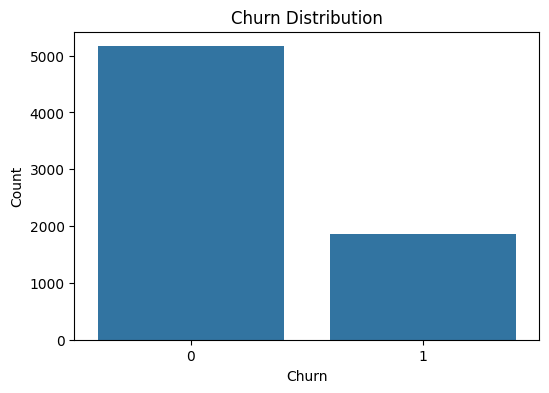

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telco_df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Story Time

**We have churn on the x-axis, 0 indicates `No` and 1 indicates `Yes` and then we have count(the number of customers)**

**As we can see, we have 0 values more, meaning customers who stay are higher than the ones who left(1 value -> the less plot on the right side)**

#### 5) Boxplot of Numerical Variables

Text(0.5, 1.0, 'Boxplot of Numerical Variables')

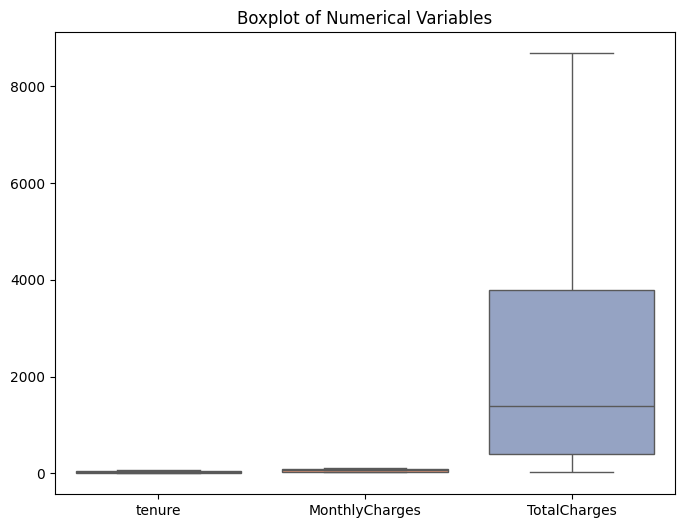

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(data=telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']], palette='Set2')
plt.title('Boxplot of Numerical Variables')


#### Story Time

**As we can see, `Tenure` and `MonthlyCharges` have much less variability compared to `TotalCharges`**

**`TotalCharges` naturally varies a lot because it's influenced by both the tenure of the customer and how much they are paying monthly**

### Bivariate Analysis

##### 1) `Contract` vs `Churn`

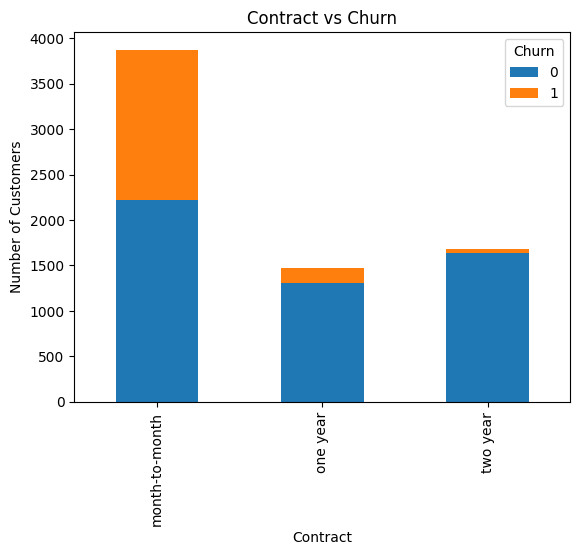

In [34]:
# Crosstab between Contract type and Churn
contract_churn = pd.crosstab(telco_df['Contract'], telco_df['Churn'])

# Stacked bar plot for Contract vs Churn
contract_churn.plot(kind='bar', stacked=True)
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()

#### What Story does it tell us?? (Above `Contract` vs `Churn` bar plot)

**Customers with a month-to-month contract have the highest churn rate, as shown by the colors section in the bar chart. it indicates that these customers are more likely to cancel compared to one-year and two-year contracts. This makes sense because customers with month-to-month contracts have more freedom to cancel without facing penalties. The longer-term contracts like one-year and two-year seem to encourage customer retention. This might indicate that offering incentives for longer-term contracts could reduce churn. So offering better incentives for long-term contracts could reduce churn, or focusing on improving the experience for month-to-month customers to reduce their likelihood of leaving.**

#### 2) `MonthlyCharges` and `tenure` relate to `Churn`

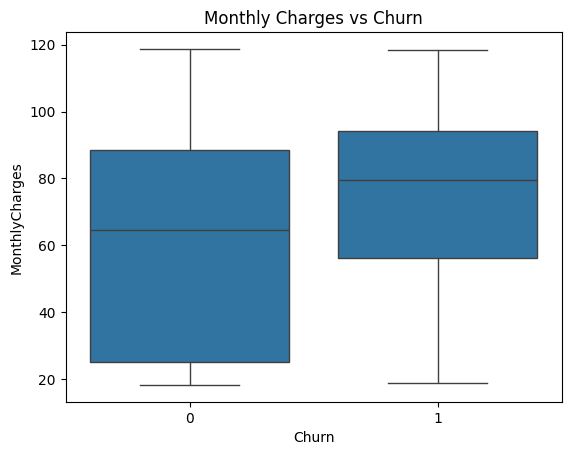

In [35]:
# Box plot of MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges vs Churn')
plt.show()

#### Story Time

**Customers with higher MonthlyCharges churn more frequently, meaning price sensitivity is a factor in customer churn, it suggests that higher fees could lead to dissatisfaction and churn**

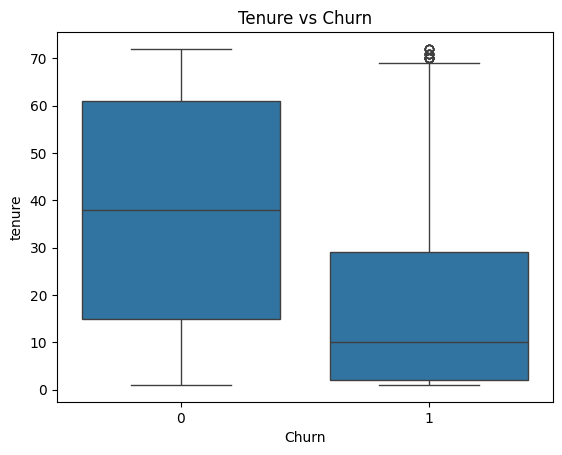

In [36]:
# Box plot of tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=telco_df)
plt.title('Tenure vs Churn')
plt.show()

#### Story Time

**This is revealing whether newer or more long-term customers are more likely to churn, we can see clearly from the above graph churn is more prevalent among customers with low tenure indicating onboarding or service-related issues, alternatively if tenure is high and churn occurs, it could suggest issues with long-term satisfaction or contract renewals**

#### 3) Combining `MonthlyCharges` and `Tenure` in relation to Churn

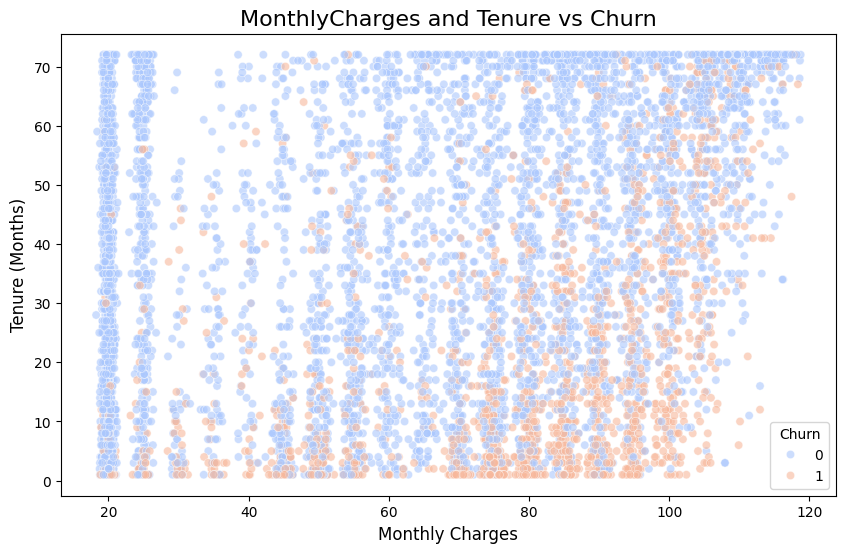

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=telco_df, x='MonthlyCharges', y='tenure', hue='Churn', palette='coolwarm', alpha=0.6)

# Add title and labels
plt.title('MonthlyCharges and Tenure vs Churn', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)

plt.show()

#### Story

**This tells us, the more `MonthlyCharges` and less `tenure` are, the more churn it indicates**

#### 4) Correlation Matrix

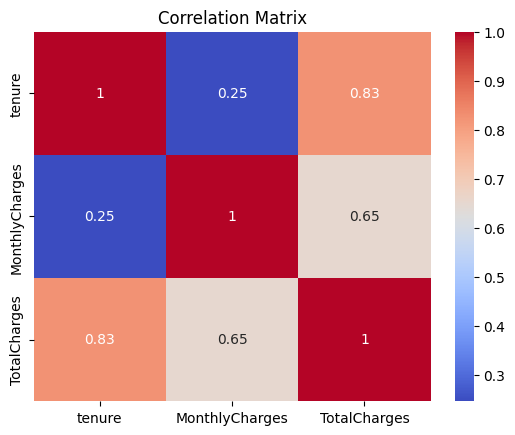

In [38]:
# Correlation matrix for numerical variables
corr = telco_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Story

**`TotalCharges` and `tenure` have a high positive correlation, makes sense because the longer a customer stays, the more they are likely to accumulate charges**

**`MonthlyCharges` and `tenure` have a weak correlation here**

**`TotalCharges` and `MonthlyCharges` have some relationship since higher monthly charges could lead to higher overall changes**

# 5. Feature Engineering 

#### 1) Categorize `Tenure`

In [39]:
# Categorize Tenure into three groups

telco_df['TenureGroup'] = pd.cut(telco_df['tenure'], bins=[0,12,24,72], labels=["Short-term", "Mid-term", "Long-term"])

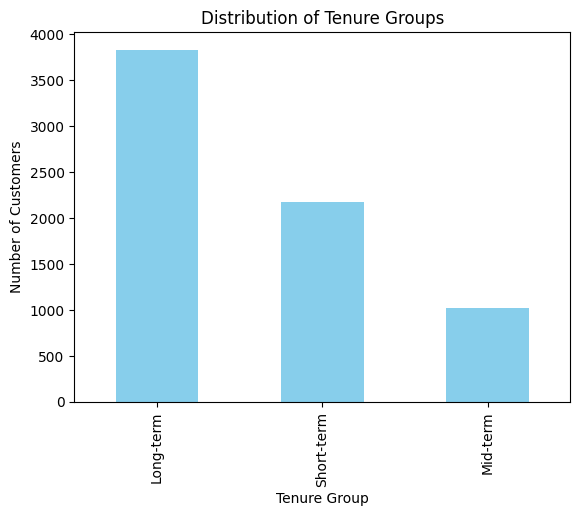

In [40]:
telco_df['TenureGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Tenure Groups')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure Group')
plt.show()

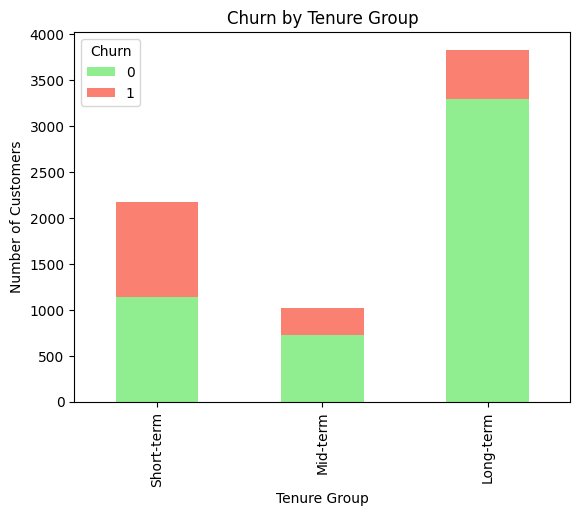

In [41]:
churn_by_tenure = pd.crosstab(telco_df['TenureGroup'], telco_df['Churn'])
churn_by_tenure.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Churn by Tenure Group')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure Group')
plt.legend(title='Churn')
plt.show()

#### 2) Encode Categorical Variables

In [42]:
# One-Hot Encoding

pd.get_dummies(telco_df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,TenureGroup,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,InternetService_fiber optic,InternetService_no
0,Female,0,1,0,1,0,no phone service,no,yes,no,...,29.85,0,Short-term,False,False,False,True,False,False,False
1,Male,0,0,0,34,1,no,yes,no,yes,...,1889.50,0,Long-term,True,False,False,False,True,False,False
2,Male,0,0,0,2,1,no,yes,yes,no,...,108.15,1,Short-term,False,False,False,False,True,False,False
3,Male,0,0,0,45,0,no phone service,yes,no,yes,...,1840.75,0,Long-term,True,False,False,False,False,False,False
4,Female,0,0,0,2,1,no,no,no,no,...,151.65,1,Short-term,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,yes,yes,no,yes,...,1990.50,0,Mid-term,True,False,False,False,True,False,False
7039,Female,0,1,1,72,1,yes,no,yes,yes,...,7362.90,0,Long-term,True,False,True,False,False,True,False
7040,Female,0,1,1,11,0,no phone service,yes,no,no,...,346.45,0,Short-term,False,False,False,True,False,False,False
7041,Male,1,1,0,4,1,yes,no,no,no,...,306.60,1,Short-term,False,False,False,False,True,True,False


#### 3) Scaling Numerical Features

In [43]:
scaler = StandardScaler()
telco_df[['MonthlyCharges', 'tenure', 'TotalCharges']] = scaler.fit_transform(telco_df[['MonthlyCharges', 'tenure', 'TotalCharges']])

# 6) Data Preprocessing

#### Train/Test Split

In [44]:
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 7) Modeling

## Logistic Regression

#### Initialize the model

In [45]:
model = LogisticRegression(max_iter=1000) # max_iter=1000 ensures the model converges

#### Train the model

In [46]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Make predictions

In [47]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [57]:
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_lr: .2f}')

Accuracy:  0.78


#### Confusion Matrix

In [49]:
print(confusion_matrix(y_test, y_pred))

[[926 107]
 [198 176]]


#### Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Random Forest

In [51]:
# Model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.78


## XGBoost

In [55]:
# Initialize XGBoost model
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Model Accuracy: {accuracy_xgb:.2f}')

XGBoost Model Accuracy: 0.78


##### Compare All Three Models

In [58]:
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.78
XGBoost Accuracy: 0.78
